# Ensembles on Heart Patient Data

## First let's understand about Ensembles

### Is Ensembles Tree Supervised / unsupervised Machine learning model?
Ensembles is a supervised learning algorithm where we train two or more different analytical model and combine their output(when output is numerical) to make predictions better.
 For Example - in this heart patient data we are taking the patient data for a decision tree classifier and combining their outcomes to make the prediction better.
### What is the aim of this Machine learning model ie what you are intending to do using this model?
With the help of this algorithm, I am intending to train a model with the help of a dataset with a patient data. I used a Decision Tree Classifier and then used Bagging and Boosting to improve the prediction accuracy.
### Briefly discuss main concept behind this algorithm.
The main concept behind this algorithm is to use the predictions of different models to make the prediction results better. Ensemble model combines the predictions of the models and then increase the output of final prediction. Although, with this model it is not always true that the prediction accuracy will be increased but most of the time it is helpful.

# Data Description
- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death event: if the patient deceased during the follow-up period (boolean)

In [39]:
# Import required packages
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import statsmodels.api as sm
from mord import LogisticIT
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from dmba import plotDecisionTree, classificationSummary, regressionSummary

from dmba.metric import AIC_score

In [19]:
# reading the data and adding it in the dataframe
data_df = pd.read_csv("/Users/mohitmehta/Desktop/BUSI_650_FinalAssignments/Datasets/heart_failure_clinical_records_dataset.csv")
data_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [20]:
data_df.columns = [s.strip().replace(' ', '_') for s in data_df.columns] # all columns

In [21]:
# describing the datatypes of dataframe
data_df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [22]:
data_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [23]:
%matplotlib inline

<AxesSubplot:>

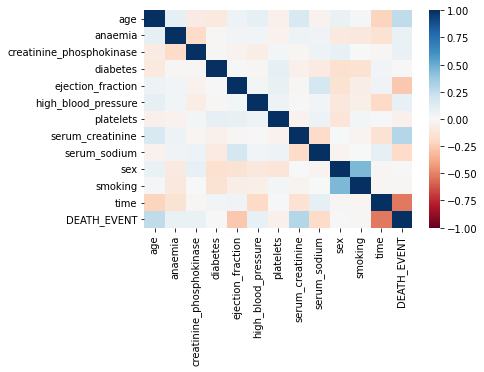

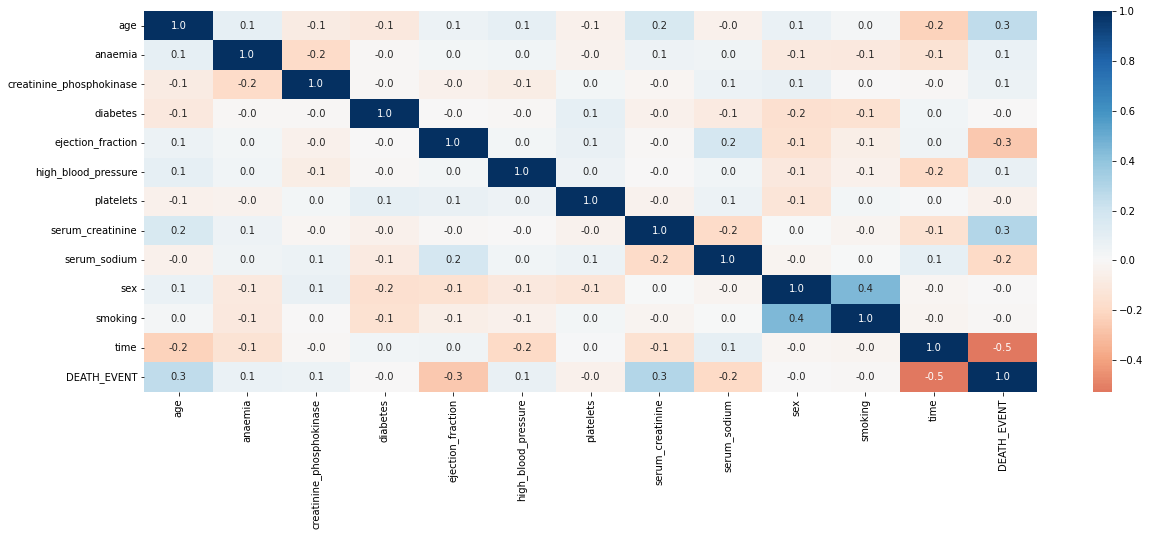

In [24]:
# drawing the correlation matrix to understand the correlation between the variables
corr = data_df.corr()
# Change the colormap to a divergent scale and fix the range of the colormap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, cmap="RdBu")

# Include information about values (example demonstrate how to control the size of the plot)
fig, ax = plt.subplots()
fig .set_size_inches(20, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

Here, in correlation matrix we can see "DEATH_EVENT" which is the outcome variable is negatively correlated with the time (follow-up days) and with that it can be understood that more chances have occured when patient visited doctor recently because they went to doctor when their condition were very bad, and not for regular check-up. Also,"DEATH_EVENT" is correlated with all other factors but not the sex, smoking, platelets, and diabetes. 

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='age'>

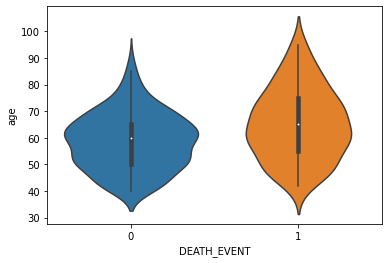

In [25]:
sns.violinplot(x='DEATH_EVENT',y='age',data=data_df,scale='area')

Here, more deaths are occured in higher age group.

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='time'>

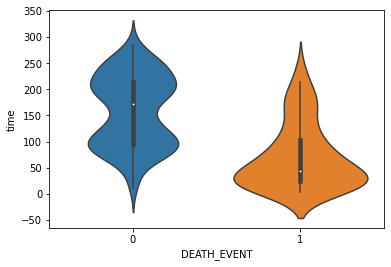

In [26]:
sns.violinplot(x='DEATH_EVENT',y='time',data=data_df,scale='area')

With this violinplot, it can be seen that more people died when they visited recently to the doctor (time variable) which can be understood that people only visits hospitals when they dont feel well rather than going for regular check-ups.

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

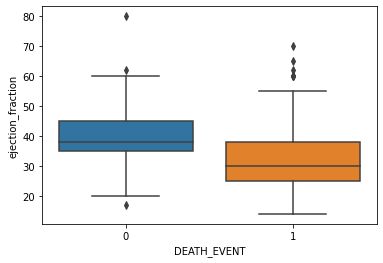

In [27]:
sns.boxplot(x='DEATH_EVENT',y='ejection_fraction',data=data_df)

There are low no of death events when ejection_fraction is low, so ejection_fraction is the variable if it is less then their are more chances of death.

In [28]:
data_df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [41]:
X = data_df.drop(['DEATH_EVENT', 'diabetes', 'platelets', 'serum_creatinine'], axis='columns')
Y = data_df['DEATH_EVENT']

Here, we are setting Y(target) as "DEATH_EVENT" and X(predictors) as all the variables except the target variable and the variables which doesnt affect the DEATH_EVENT.

In [42]:
train_X, valid_X, train_Y, valid_Y = train_test_split(X, Y, test_size=0.4, random_state=3)

In [43]:
# single tree
defaultTree = DecisionTreeClassifier(random_state=1)
defaultTree.fit(train_X, train_Y)
classes = defaultTree.classes_
classificationSummary(valid_Y, defaultTree.predict(valid_X), class_names=classes)

Confusion Matrix (Accuracy 0.6917)

       Prediction
Actual  0  1
     0 58 26
     1 11 25


Here, we trained DecisionTreeClassifier with the training dataset and later we used that with valid dataset. 

# Bagging 
It is a form of ensemble which is based on averaging accross multiple random data samples.

In [44]:
# bagging 
bagging = BaggingClassifier(DecisionTreeClassifier(random_state=1), 
                            n_estimators=100, random_state=1)
bagging.fit(train_X, train_Y)
classificationSummary(valid_Y, bagging.predict(valid_X), class_names=classes)

Confusion Matrix (Accuracy 0.7833)

       Prediction
Actual  0  1
     0 67 17
     1  9 27


Here, we used Bagging with DecisionTreeClassifier to make the accuracy better which is increased if we compare it without bagging.

# Boosting 
It is a form of ensemble which focuses on improving the areas where model is making more errors, it targets the records which has high percentage of prediction errors.

In [45]:
# boosting
boost = AdaBoostClassifier(DecisionTreeClassifier(random_state=1), 
                            n_estimators=100, random_state=1)
boost.fit(train_X, train_Y)
classificationSummary(valid_Y, boost.predict(valid_X), class_names=classes)

Confusion Matrix (Accuracy 0.6833)

       Prediction
Actual  0  1
     0 58 26
     1 12 24


Here, we used Boosting with DecisionTreeClassifier to make the accuracy better but it is decreased if we compare it without boosting.